In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [12]:
raw_data = pd.read_csv('/content/datasets/Samsung.csv')
print(raw_data.head())

         Date    Open    High     Low   Close    Adj Close      Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


In [13]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

              Open    High     Low   Close    Adj Close      Volume
Date                                                               
2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


In [58]:
#필요 날짜행만 추출
data = raw_data['2020-06-15':'2021-06-14'][['Open', 'High', 'Low', 'Close', 'Volume']]
print(data.tail())
print(data.info())

               Open     High      Low    Close      Volume
Date                                                      
2021-06-07  82700.0  82800.0  81600.0  81900.0  16496197.0
2021-06-08  82300.0  82600.0  81800.0  81900.0  12781226.0
2021-06-09  81500.0  82000.0  81100.0  81100.0  14908823.0
2021-06-10  81300.0  81400.0  80900.0  81000.0  17586995.0
2021-06-11  81200.0  81700.0  80700.0  81000.0  14087962.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    247 non-null    float64
 1   High    247 non-null    float64
 2   Low     247 non-null    float64
 3   Close   247 non-null    float64
 4   Volume  247 non-null    float64
dtypes: float64(5)
memory usage: 11.6 KB
None


In [59]:
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    247 non-null    float64
 1   High    247 non-null    float64
 2   Low     247 non-null    float64
 3   Close   247 non-null    float64
 4   Volume  247 non-null    float64
dtypes: float64(5)
memory usage: 11.6 KB
None


In [60]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:5])
print(scaled_data.shape)

[[0.00511509 0.         0.         0.         0.24017957]
 [0.         0.00223214 0.01767677 0.05352798 0.15418047]
 [0.0230179  0.02008929 0.03535354 0.05596107 0.21424448]
 [0.02557545 0.00669643 0.04292929 0.05839416 0.08224709]
 [0.03580563 0.02008929 0.04292929 0.0729927  0.109105  ]]
(247, 5)


In [61]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i:i+28] # i ~ i+27번째 feature은
    _y = scaled_data[i+28][3] # i+28번째가 label
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.00511509 0.         0.         0.         0.24017957]
 [0.         0.00223214 0.01767677 0.05352798 0.15418047]
 [0.0230179  0.02008929 0.03535354 0.05596107 0.21424448]
 [0.02557545 0.00669643 0.04292929 0.05839416 0.08224709]
 [0.03580563 0.02008929 0.04292929 0.0729927  0.109105  ]
 [0.02046036 0.01339286 0.0479798  0.05109489 0.05530872]
 [0.03324808 0.01785714 0.03030303 0.03649635 0.10821799]
 [0.01790281 0.04241071 0.04292929 0.0729927  0.18765843]
 [0.0230179  0.02232143 0.05050505 0.0486618  0.11384222]
 [0.04092072 0.04241071 0.05808081 0.08272506 0.15130317]
 [0.03324808 0.02678571 0.0530303  0.06082725 0.10439962]
 [0.06905371 0.04241071 0.07323232 0.07055961 0.14613934]
 [0.05626598 0.03571429 0.06313131 0.06569343 0.09117747]
 [0.0230179  0.02008929 0.05555556 0.0729927  0.0595223 ]
 [0.04603581 0.03571429 0.07070707 0.09002433 0.0316808 ]
 [0.07161125 0.06696429 0.09848485 0.12408759 0.13007999]
 [0.11764706 0.08705357 0.08838384 0.08515815 0.26471667]
 [0.06138107 0

In [62]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.00511509 0.         0.         0.         0.24017957]
 [0.         0.00223214 0.01767677 0.05352798 0.15418047]
 [0.0230179  0.02008929 0.03535354 0.05596107 0.21424448]
 [0.02557545 0.00669643 0.04292929 0.05839416 0.08224709]
 [0.03580563 0.02008929 0.04292929 0.0729927  0.109105  ]
 [0.02046036 0.01339286 0.0479798  0.05109489 0.05530872]
 [0.03324808 0.01785714 0.03030303 0.03649635 0.10821799]
 [0.01790281 0.04241071 0.04292929 0.0729927  0.18765843]
 [0.0230179  0.02232143 0.05050505 0.0486618  0.11384222]
 [0.04092072 0.04241071 0.05808081 0.08272506 0.15130317]
 [0.03324808 0.02678571 0.0530303  0.06082725 0.10439962]
 [0.06905371 0.04241071 0.07323232 0.07055961 0.14613934]
 [0.05626598 0.03571429 0.06313131 0.06569343 0.09117747]
 [0.0230179  0.02008929 0.05555556 0.0729927  0.0595223 ]
 [0.04603581 0.03571429 0.07070707 0.09002433 0.0316808 ]
 [0.07161125 0.06696429 0.09848485 0.12408759 0.13007999]
 [0.11764706 0.08705357 0.08838384 0.08515815 0.26471667]
 [0.06138107 0

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size = 0.2,
    random_state=30)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(175, 28, 5)
(175,)
(44, 28, 5)
(44,)


In [64]:
model = Sequential()
#SimpleRNN, GRU, LSTM
model.add(LSTM(50,
    input_shape=(X_train.shape[1], X_train.shape[2]), #X_train.shape의 2번째, 3번째 데이터 (28, 5)
     activation='tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                11200     
_________________________________________________________________
flatten_2 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [65]:
fit_hist = model.fit(X_train, Y_train
    epochs=500, validation_data=(X_test, Y_test), shuffle=False)

Epoch 1/500
6/6 [==============================] - 2s 70ms/step - loss: 0.1169 - val_loss: 0.0066
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0223 - val_loss: 0.0310
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0070
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0116
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0056
Epoch 8/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 9/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 10/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 11/500
6/6 [==========

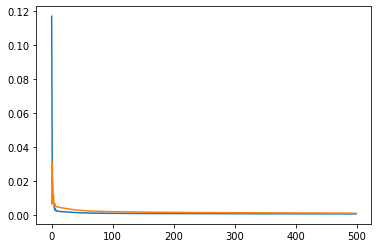

In [91]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [67]:
predict = model.predict(X_test)

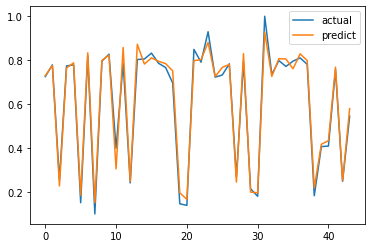

In [68]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [71]:
test_data = raw_data['2021-04-15':'2021-06-14'][['Open', 'High', 'Low', 'Close', 'Volume']]
print(test_data.head())
print(test_data.info())
print(test_data.shape)

               Open     High      Low    Close      Volume
Date                                                      
2021-04-15  83700.0  84500.0  83400.0  84100.0  16377412.0
2021-04-16  84700.0  84700.0  83600.0  83900.0  15429522.0
2021-04-19  83800.0  84000.0  83300.0  83300.0  15287311.0
2021-04-20  83300.0  84000.0  83100.0  83900.0  15521965.0
2021-04-21  83300.0  83500.0  82500.0  82600.0  21636079.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2021-04-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    40 non-null     float64
 1   High    40 non-null     float64
 2   Low     40 non-null     float64
 3   Close   40 non-null     float64
 4   Volume  40 non-null     float64
dtypes: float64(5)
memory usage: 1.9 KB
None
(40, 5)


In [76]:
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[0.8056266  0.6875     0.80050505 0.77858881 0.08858503]
 [0.79539642 0.68303571 0.80555556 0.77858881 0.0427121 ]
 [0.77493606 0.66964286 0.78787879 0.75912409 0.06898393]
 [0.76982097 0.65625    0.78282828 0.756691   0.10205434]
 [0.76726343 0.66294643 0.77777778 0.756691   0.05884784]]
(40, 5)


In [73]:
scaled_test_data[39][3]

0.75669099756691

In [74]:
original_value = minmaxscaler.inverse_transform(scaled_test_data[39].reshape(-1,5))
print(original_value)

[[   81200.    81700.    80700.    81000. 14087962.]]


In [75]:
print(test_data.iloc[39])

Open         81200.0
High         81700.0
Low          80700.0
Close        81000.0
Volume    14087962.0
Name: 2021-06-11 00:00:00, dtype: float64


In [92]:
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28] 
    _y = scaled_test_data[i+28][3] 
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)

In [93]:
predict = model.predict(sequence_testdata_X)

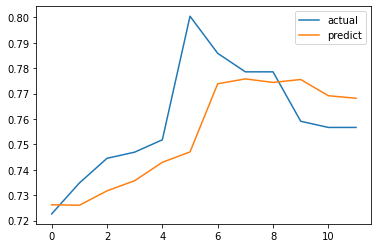

In [94]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [95]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [96]:
last_28_data = last_28_data.reshape(-1,28,5)
last_28_data.shape

(1, 28, 5)

In [97]:
today_close = model.predict(last_28_data)
print(today_close)

[[0.7697559]]


In [98]:
minmaxscaler_close = MinMaxScaler()
_ = minmaxscaler_close.fit_transform(data[['Close']]) # 데이터를 받을 필요없으니 _사용
today_close = minmaxscaler_close.inverse_transform(today_close)
print(today_close)

[[81536.97]]
